In [ ]:
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.regularizers import l2

import matplotlib.pyplot as plt

In [ ]:
# Load top 10,000 most frequent words
max_features = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

c:\Users\PMYLS\Downloads\Machine-Learning-Projects\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=2, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

In [6]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2,
                    verbose=2,
                    callbacks=callbacks)


Epoch 1/10
313/313 - 286s - 912ms/step - accuracy: 0.7592 - loss: 0.4953 - val_accuracy: 0.8370 - val_loss: 0.3809
Epoch 2/10
313/313 - 506s - 2s/step - accuracy: 0.8488 - loss: 0.3659 - val_accuracy: 0.8298 - val_loss: 0.4012
Epoch 3/10
313/313 - 616s - 2s/step - accuracy: 0.8773 - loss: 0.3087 - val_accuracy: 0.8394 - val_loss: 0.3901


In [7]:
score, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {score:.4f}")
print(f"Test Accuracy: {acc:.4f}")

Test Loss: 0.3825
Test Accuracy: 0.8372


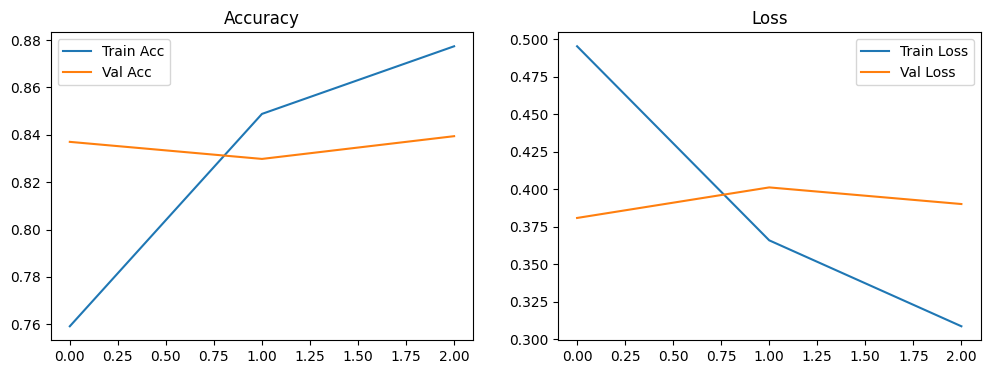

In [10]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review if i >= 3])

samples = X_test[:5]
predictions = model.predict(samples)
# for i, pred in enumerate(predictions):
#     print("Review:", decode_review(samples[i]))
#     print("Predicted Sentiment:", "Positive" if pred[0] > 0.5 else "Negative")


decoded_reviews = [decode_review(sample) for sample in samples]
predicted_sentiments = ["Positive" if pred[0] > 0.5 else "Negative" for pred in predictions]

df_results = pd.DataFrame({
    "Review": decoded_reviews,
    "Predicted Sentiment": predicted_sentiments
})

df_results



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


,Review,Predicted Sentiment
0,please give this one a miss br br and the rest...,Negative
1,psychological it's very interesting that rober...,Positive
2,everyone's horror the promptly eats the mayor ...,Positive
3,i generally love this type of movie however th...,Positive
4,like some other people wrote i'm a die hard ma...,Positive
